<a href="https://colab.research.google.com/github/ianbounos/brain-networks/blob/main/C_Elegans_Binary_Undirected_Graph_Centrality_Measures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C Elegans - Binary undirected graph - Centrality Measures



In [1]:

from google.colab import drive

# Monta tu Google Drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


In [3]:
file_path = "/content/drive/My Drive/Grafos y Cerebro/celegans277matrix.csv"
adjacency_matrix = pd.read_csv(file_path, header=None)

# Create undirected graph from adjacency grapha
G = nx.DiGraph(adjacency_matrix.values)
G = G.to_undirected()



We can define **Eigenvector centrality** of the $k$ node as the $k$th position of the eigenvector corresponding to the largest eigenvalue. Eigenvector centrality is a measure that accounts for the quantity and quality of a
node’s connections. It considers both the degree of that node and the degree of its
neighbors.

In [4]:

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(adjacency_matrix)

# Find the index of the largest eigenvalue
index_of_max_eigenvalue = np.argmax(eigenvalues)

# Get the eigenvector corresponding to the largest eigenvalue
eigenvector_max_eigenvalue = eigenvectors[:, index_of_max_eigenvalue]

print(f"Largest eigenvalue: {eigenvalues[index_of_max_eigenvalue]}")


Largest eigenvalue: (9.056222616336498+0j)


In [5]:
#### for example, the 10th node has the following eigenvector centrality

abs(eigenvector_max_eigenvalue[10])


0.01812290218696925

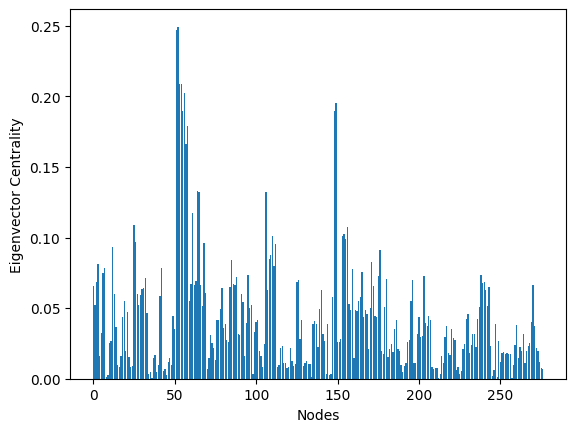

In [6]:
eigenvector_centrality = nx.eigenvector_centrality(G)

# Extract nodes and their centrality values
nodes = list(eigenvector_centrality.keys())
centralities = list(eigenvector_centrality.values())

# Create a bar chart
plt.bar(nodes, centralities)

# Label the axes
plt.xlabel('Nodes')
plt.ylabel('Eigenvector Centrality')

# Show the chart
plt.show()

**Page Rank**

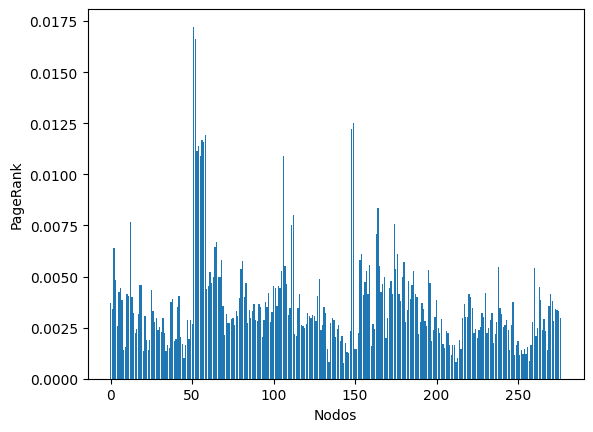

In [7]:
pagerank = nx.pagerank(G)

nodes_pr = list(pagerank.keys())
ranks_pr = list(pagerank.values())

plt.bar(nodes_pr, ranks_pr)
plt.xlabel('Nodos')
plt.ylabel('PageRank')
plt.show()

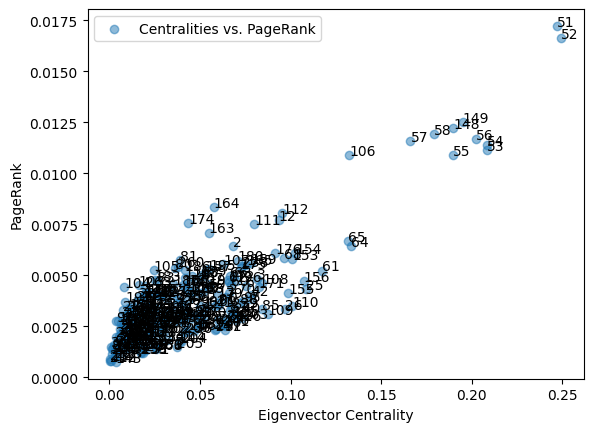

In [8]:
# Create a scatter plot
plt.scatter(centralities, ranks_pr, alpha=0.5, label='Centralities vs. PageRank')

# Label the axes
plt.xlabel('Eigenvector Centrality')
plt.ylabel('PageRank')

# Add labels for each point
for i, node in enumerate(nodes):
    plt.annotate(node, (centralities[i], ranks_pr[i]))

# Show the plot
plt.legend()
plt.show()

**Closeness Centrality**

In [9]:
closeness_centrality = nx.closeness_centrality(G)
k = 10
node_centrality = closeness_centrality[k]
print(f"closeness centrality node k: {node_centrality}")

closeness centrality node k: 0.3714670255720054


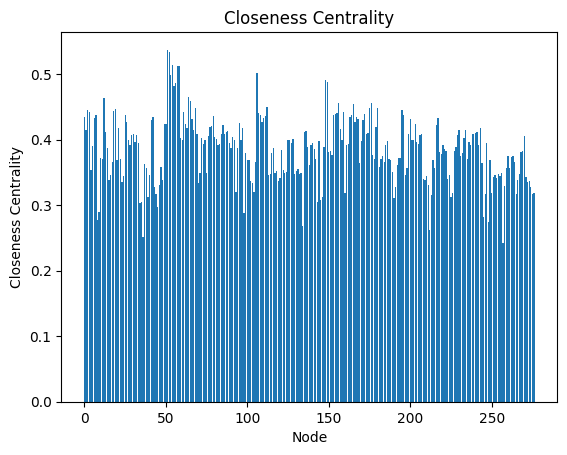

In [10]:
# Extract nodes and their corresponding closeness centrality values
nodes = list(closeness_centrality.keys())
centrality_values = list(closeness_centrality.values())

# Create a bar plot
plt.bar(nodes, centrality_values)
plt.title("Closeness Centrality")
plt.xlabel("Node")
plt.ylabel("Closeness Centrality")
plt.show()

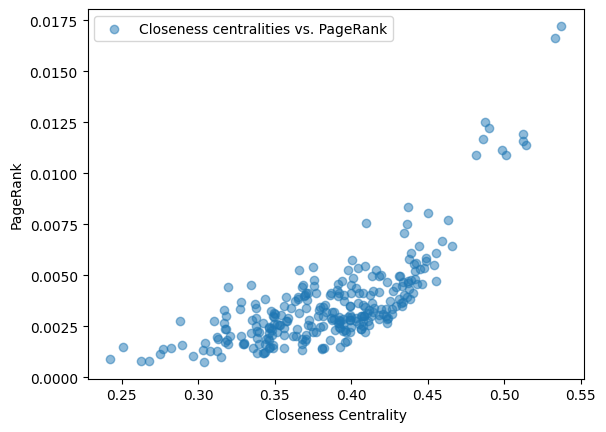

In [11]:
# Create a scatter plot
plt.scatter(centrality_values, ranks_pr, alpha=0.5, label='Closeness centralities vs. PageRank')

# Label the axes
plt.xlabel('Closeness Centrality')
plt.ylabel('PageRank')

# Add labels for each point
#for i, node in enumerate(nodes):
 #   plt.annotate(node, (centralities[i], ranks_pr[i]))

# Show the plot
plt.legend()
plt.show()

**Betweness Centrality**

One interesting property of nodal betweenness centrality is that a vertex does not
need to have a high degree to be considered topologically central.

Both closeness and betweenness centrality are based on shortest paths. Therefore, the identification of a node as topologically central using one of these
measures is based on the assumption that information is routed along the shortest
paths of the network

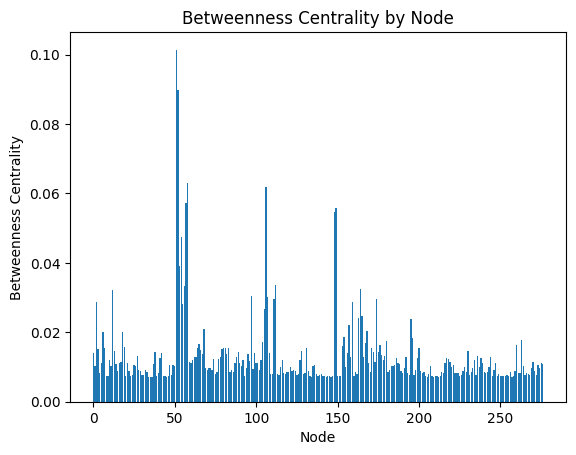

In [12]:

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G, normalized=True, endpoints=True)

# Get nodes and their betweenness centrality values
nodes = list(betweenness_centrality.keys())
centralities_betweness = list(betweenness_centrality.values())

# Create a bar chart
plt.bar(nodes, centralities_betweness)
plt.xlabel("Node")
plt.ylabel("Betweenness Centrality")
plt.title("Betweenness Centrality by Node")
plt.show()

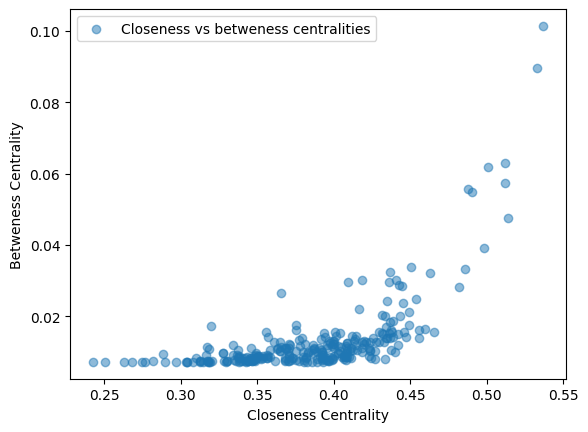

In [13]:
# Create a scatter plot
plt.scatter(centrality_values, centralities_betweness, alpha=0.5, label='Closeness vs betweness centralities')

# Label the axes
plt.xlabel('Closeness Centrality')
plt.ylabel('Betweness Centrality')


# Show the plot
plt.legend()
plt.show()

"Moreover, the authors found
that measures of degree, closeness centrality, and betweenness centrality were all
moderately correlated, and that high degree nodes also ranked highly on
these other centrality metrics "


"The analysis of Sporns and colleagues (2007) suggests that hubs in brain net-
works have several topological characteristics. First, they have high degree and
connect to many other nodes. Second, they have high closeness centrality, and are
thus able to communicate with many other nodes via only a small number of links.
Third, they have high betweenness and low clustering, by virtue of their role in inte-
grating otherwise unconnected nodes."